In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from SVM import BinarizedSVM

In [5]:
df = pd.read_csv("datasets/diabetes.csv")

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [26]:
X = df.values[:,:-1]
y = df["Outcome"].apply(lambda x: 1 if x==1 else -1).values

In [34]:
X = MinMaxScaler().fit_transform(X)

In [35]:
X.shape

(768, 8)

In [36]:
sum(y==1)

268

In [43]:
svm = BinarizedSVM(C=10000, verbose=True)
svm.fit(X, y, predictor_variables_names=df.columns[:-1].values)
y_pred = svm.predict(X)
accuracy_score(y_pred, y)

Nomi delle variabili: ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
initializing F...
iteration 0----------------------------------------------------------------------------------------------------
scelgo le soglie per 0...
soglie trovate: b_plus:0.4117647058823529	 b_minus:0.058823529411764705
	aggiungo soglia+ per 0...
	aggiungo soglia- per 0...
scelgo le soglie per 1...
soglie trovate: b_plus:0.7236180904522613	 b_minus:0.22110552763819097
	aggiungo soglia+ per 1...
scelgo le soglie per 2...
soglie trovate: b_plus:0.8032786885245902	 b_minus:0.19672131147540983
	aggiungo soglia+ per 2...
scelgo le soglie per 3...
soglie trovate: b_plus:0.6363636363636365	 b_minus:0.08080808080808081
	aggiungo soglia+ per 3...
	aggiungo soglia- per 3...
scelgo le soglie per 4...
soglie trovate: b_plus:0.24231678486997635	 b_minus:0.017730496453900707
	aggiungo soglia+ per 4...
	aggiungo soglia- per 4...
scelgo le soglie per 5...
soglie tro

0.3489583333333333

In [40]:
sum(y_pred==1)

768

[(7.0, 1.917431339672382), (3.0, 1.6619199605719854)]
[(155.0, 1.8102084679613895), (155.0, 1.8102084679613895), (117.0, 9.760654151817526)]
[(72.0, -0.9384314123543527)]
[(23.0, 1.7669488567464882)]
[(237.0, 0.29181663349091747), (30.5, -1.2436259399527603)]
[(40.9, 1.7553178250552093), (32.0, 2.7070599154320196)]
[(0.741, 1.775836825858506), (0.3725, 3.187854414408377)]
[(29.0, 1.934317433867013)]


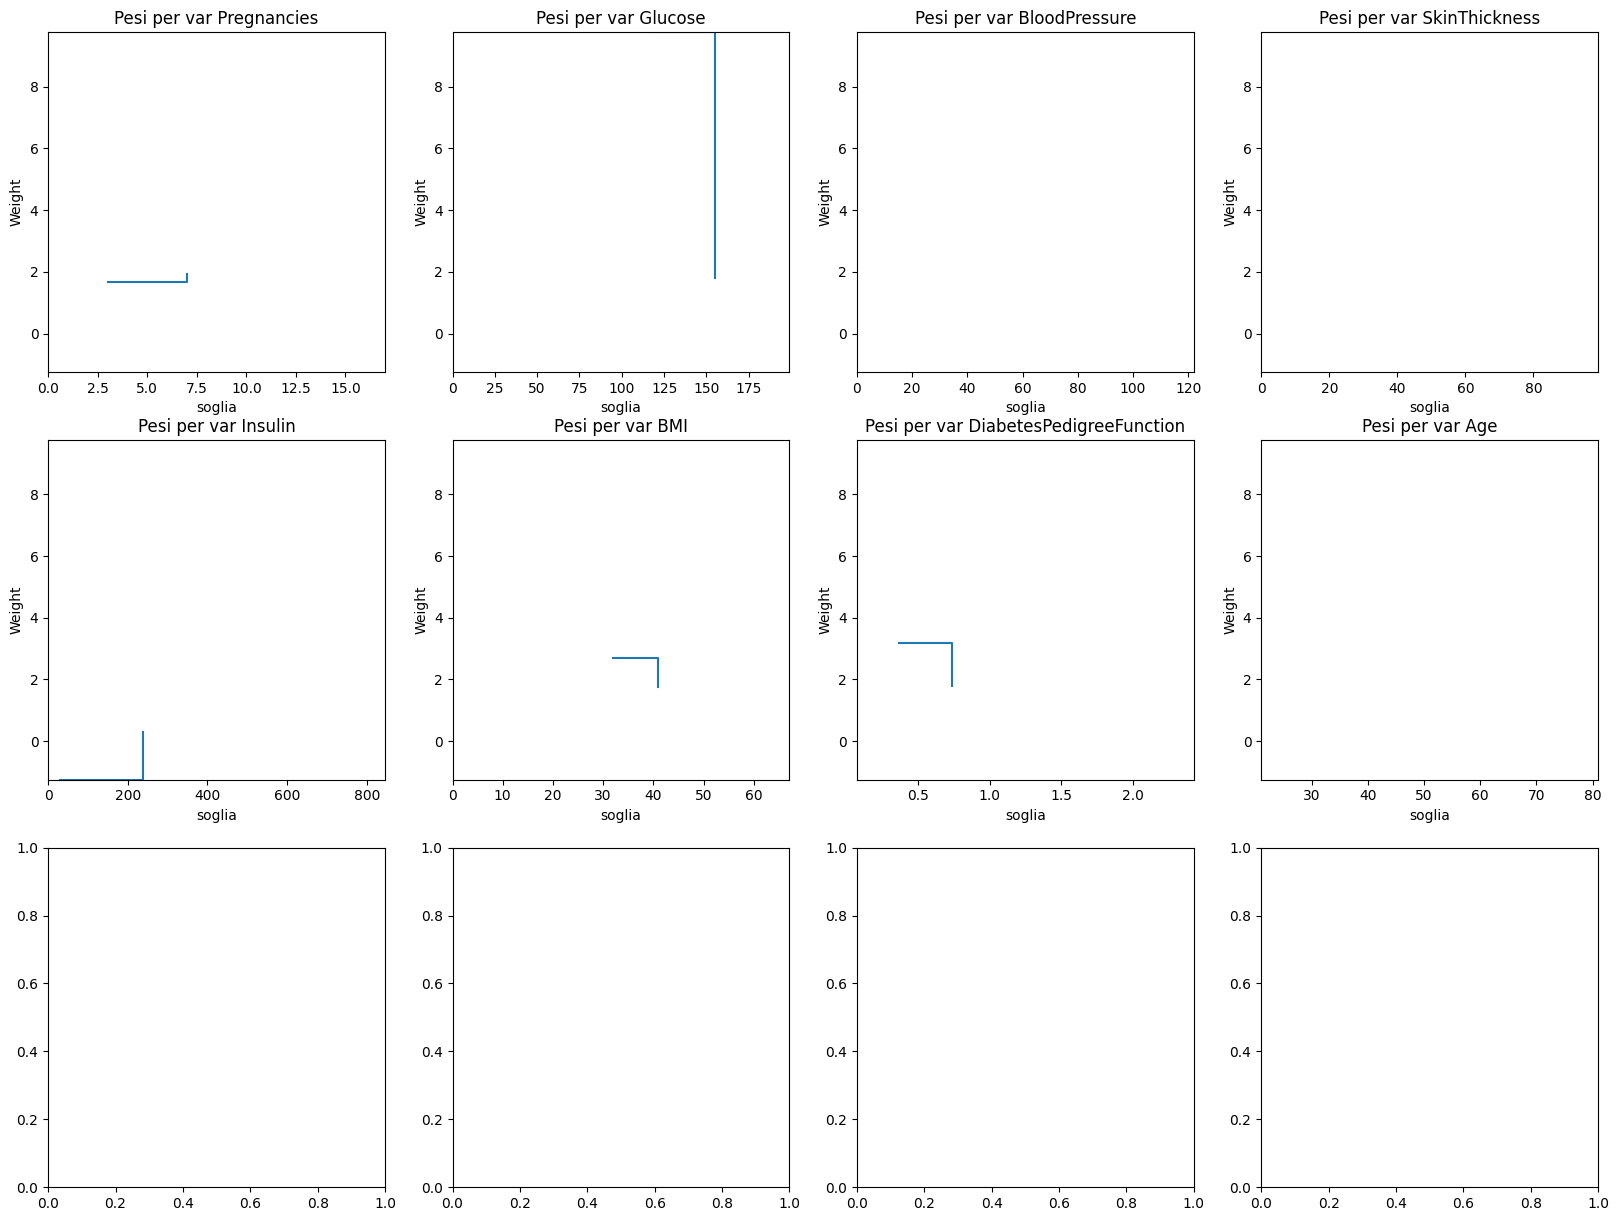

In [31]:
BinarizedSVM.visualizza_soglie(svm)

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC(C=10, kernel='linear')
svc.fit(X, y)
accuracy_score(svc.predict(X), y)

KeyboardInterrupt: 

In [ ]:
print(sum(y==-1), sum(y==1))
print(sum(y==1)/len(y))